In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

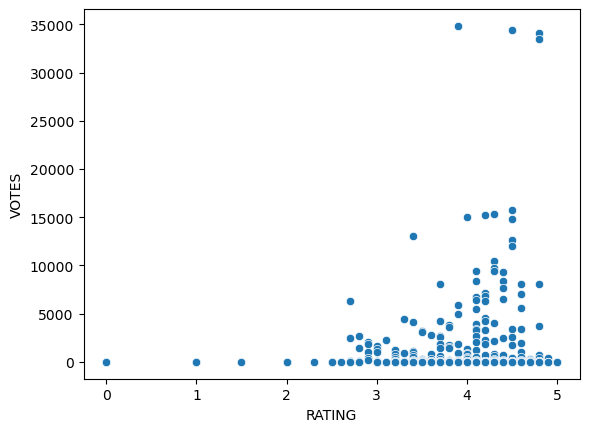

In [5]:
sns.scatterplot(data = fandango, y ='VOTES',x = 'RATING')

In [6]:
  
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [7]:

  
title = 'Film Title Name(Year)'
title.split('(')[-1].replace(')','')

'Year'

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [9]:
 
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

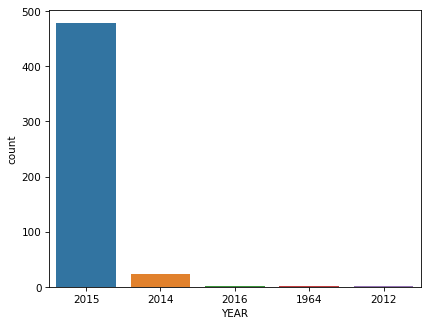

In [10]:
 
plt.figure(dpi = 75)
sns.countplot(data = fandango,x = 'YEAR')

In [11]:
 
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**How many movies have zero votes?**

In [12]:
 
novotes = fandango['VOTES'] == 0
novotes.sum()

69

In [13]:
 
fan = fandango[fandango['VOTES']>0]
fan

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


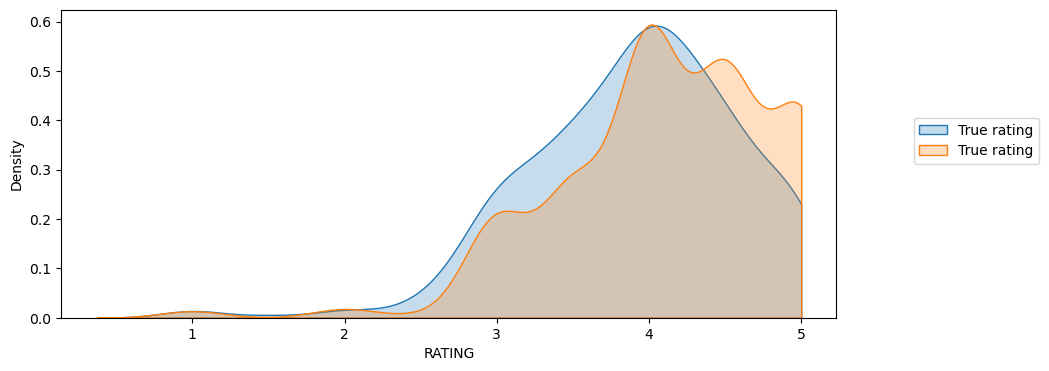

In [14]:
 
plt.figure(figsize= [10,4])
sns.kdeplot(data = fan , x = 'RATING',clip = [0,5],fill = True,label = 'True rating')
sns.kdeplot(data = fan , x = 'STARS',clip = [0,5],fill = True,label = 'True rating')
plt.legend(loc = [1.1,0.5])

In [ ]:
 
fan['STARS_DIFF'] = fan['STARS'] - fan['RATING']
fan['STARS_DIFF'] = fan['STARS_DIFF'].round(2)

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

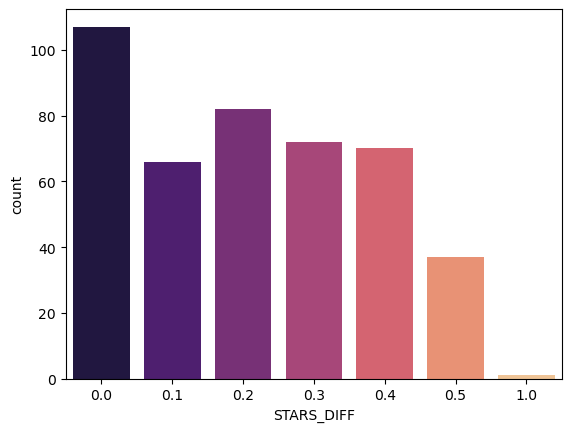

In [16]:
 
sns.countplot(data = fan, x= 'STARS_DIFF',palette = 'magma')

In [17]:
 
fan[fan['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [18]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


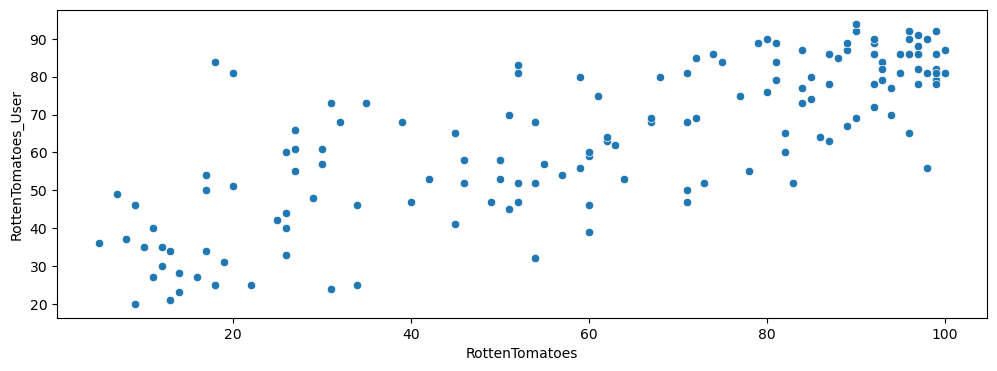

In [22]:
  
plt.figure(figsize= (12,4))
sns.scatterplot(data = all_sites,x = 'RottenTomatoes',y = 'RottenTomatoes_User')
plt.xlim = (0,100)
plt.ylim = (0,200)

In [23]:
 
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [24]:
  
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

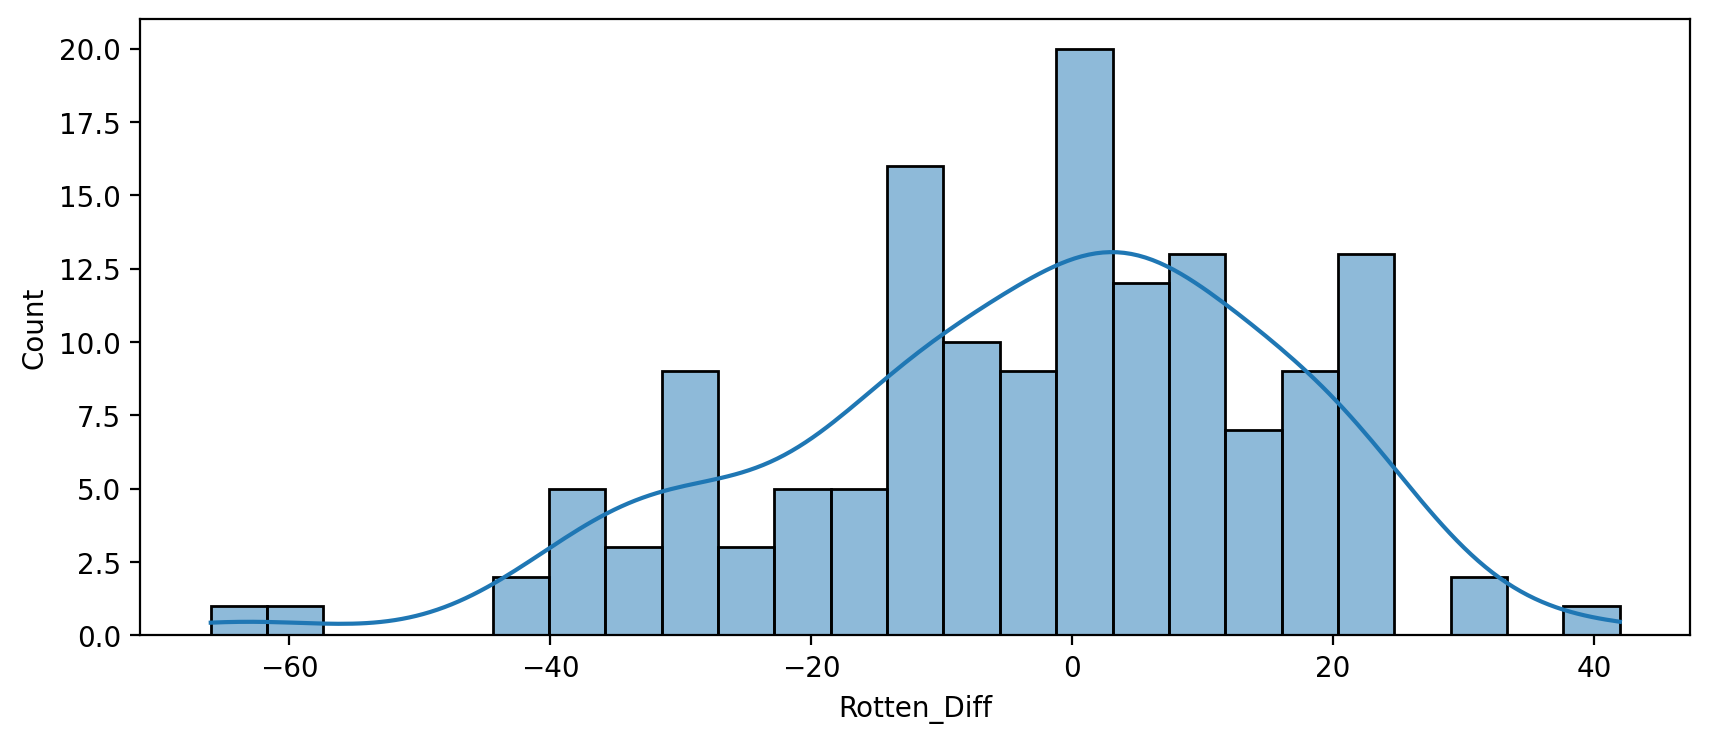

In [25]:
 
plt.figure(figsize = (10,4),dpi =200)
sns.histplot(data = all_sites, x = 'Rotten_Diff',kde = True, bins = 25)


<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

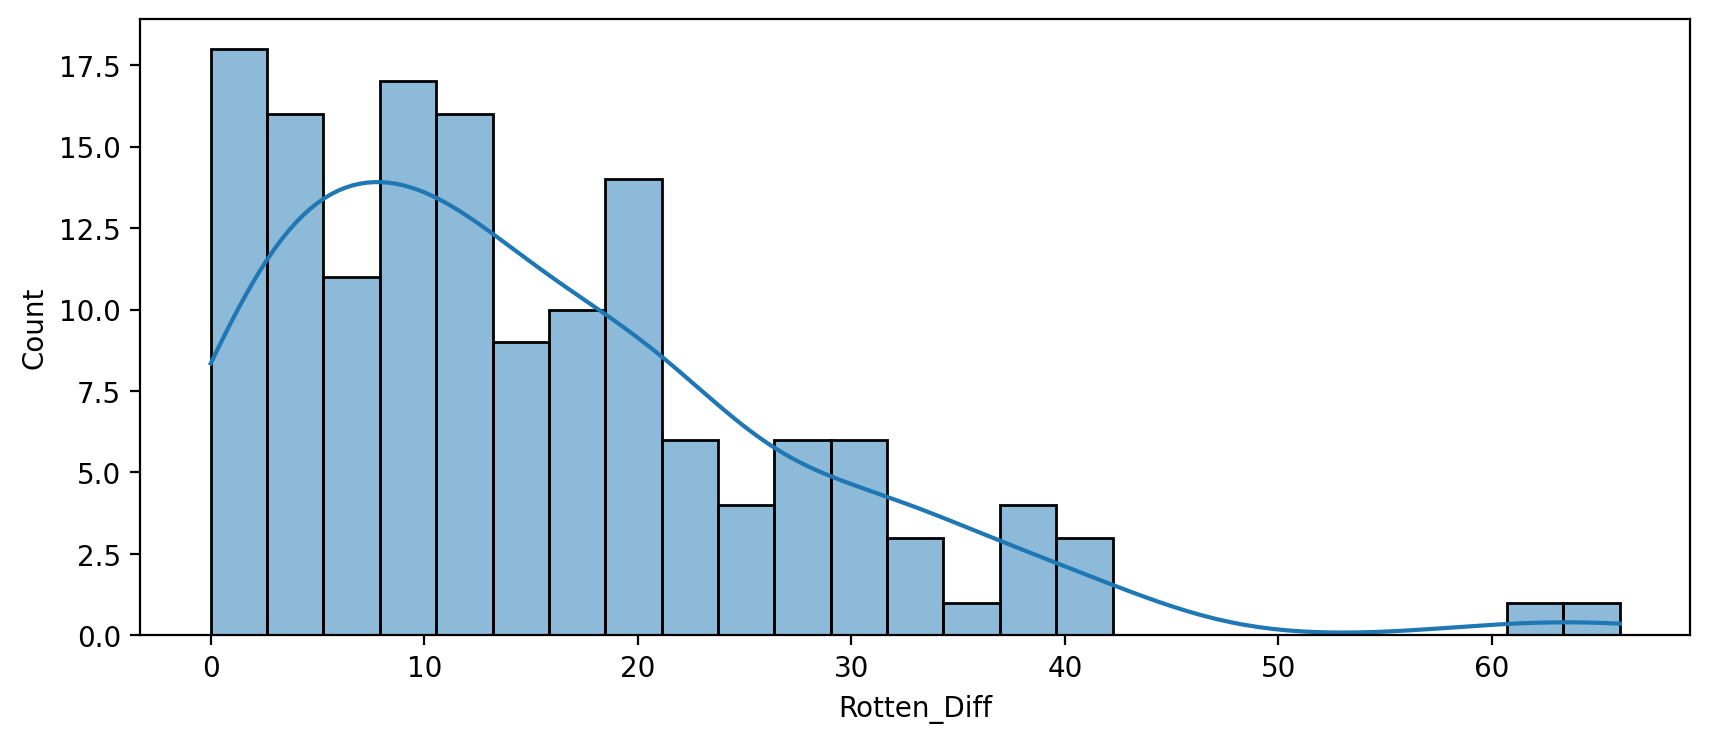

In [26]:
 
plt.figure(figsize = (10,4),dpi =200)
sns.histplot(data = (all_sites['Rotten_Diff'].apply(abs)),kde = True, bins = 25)


In [27]:

all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


TypeError: 'tuple' object is not callable

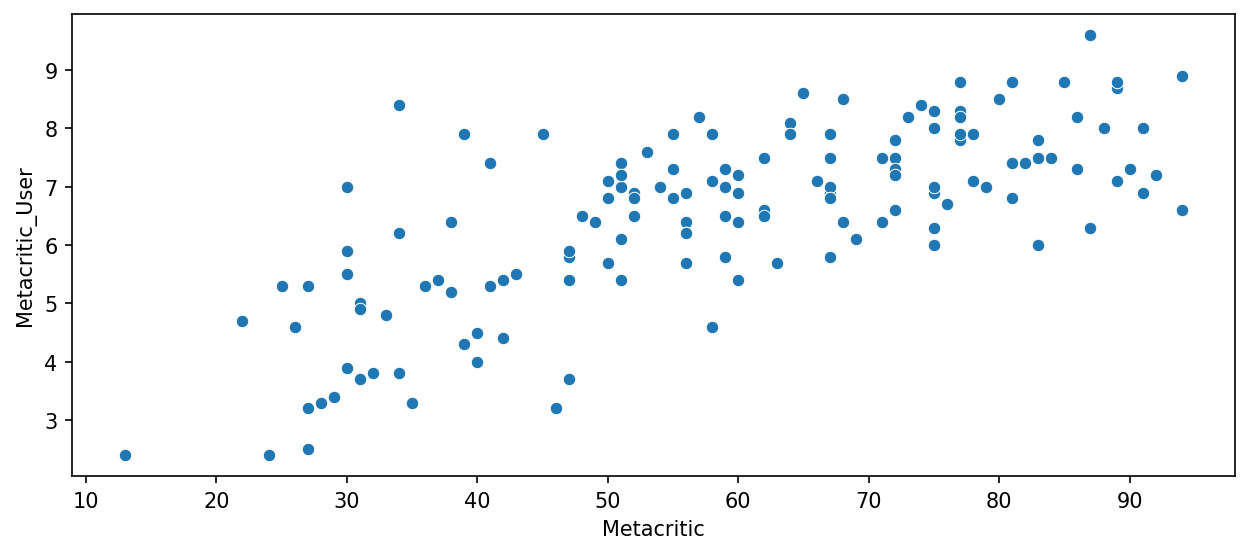

In [32]:
plt.figure(figsize = (10,4),dpi=150)
sns.scatterplot(data = all_sites,x = 'Metacritic', y = 'Metacritic_User')
plt.xlim(xmin  =0 ,xmax = 10)

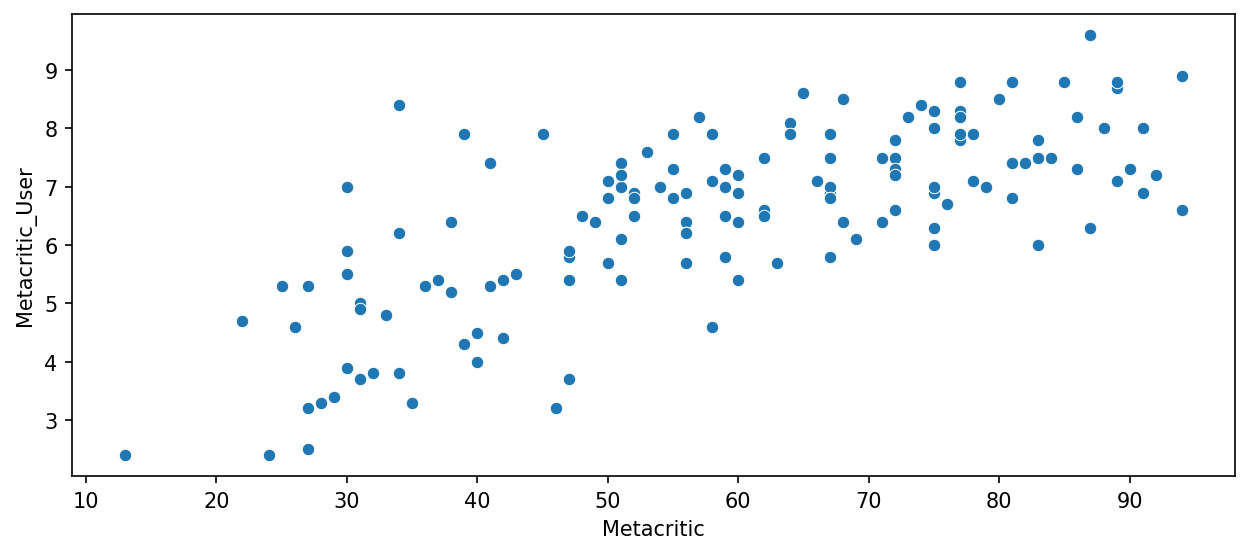

In [30]:
  
plt.figure(figsize= (10,4),dpi=150)
sns.scatterplot(data = all_sites,x = 'Metacritic', y = 'Metacritic_User')
plt.xlim = (0,100)
plt.ylim = (0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

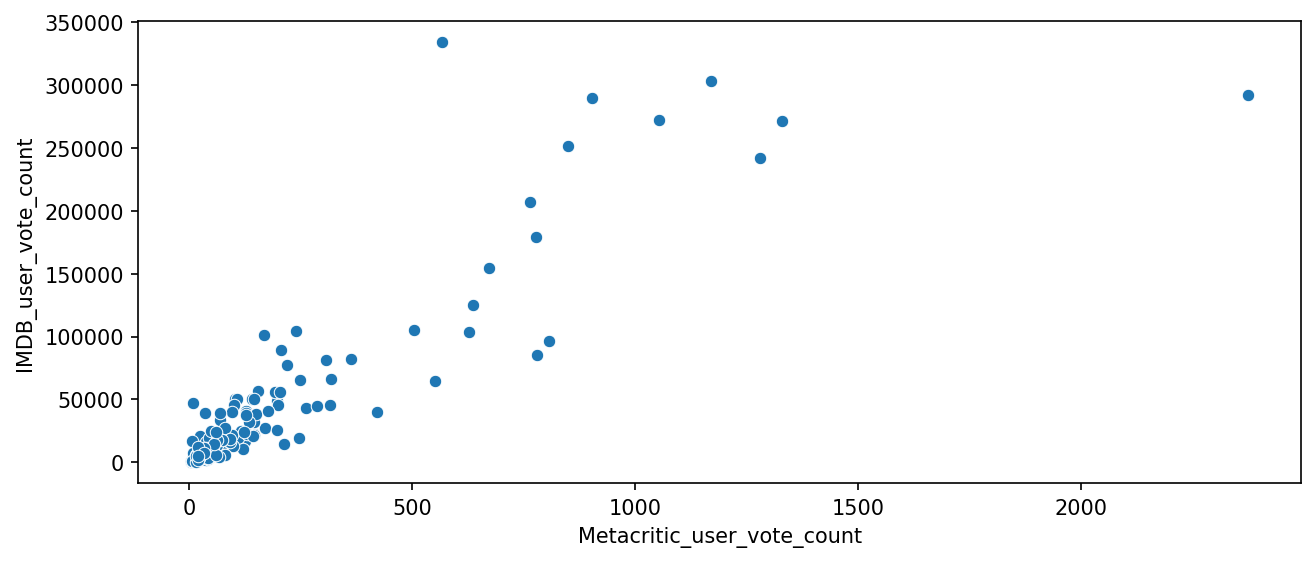

In [35]:
 
plt.figure(figsize= (10,4),dpi=150)
sns.scatterplot(data = all_sites,x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

In [37]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [38]:
 
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [42]:
 
df = pd.merge(fandango,all_sites,on = 'FILM')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [46]:
  
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)
# df['_Norm'] = np.round(df['']/20,1)
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [47]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [49]:
norm = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


TypeError: move_legend() missing 1 required positional argument: 'obj'

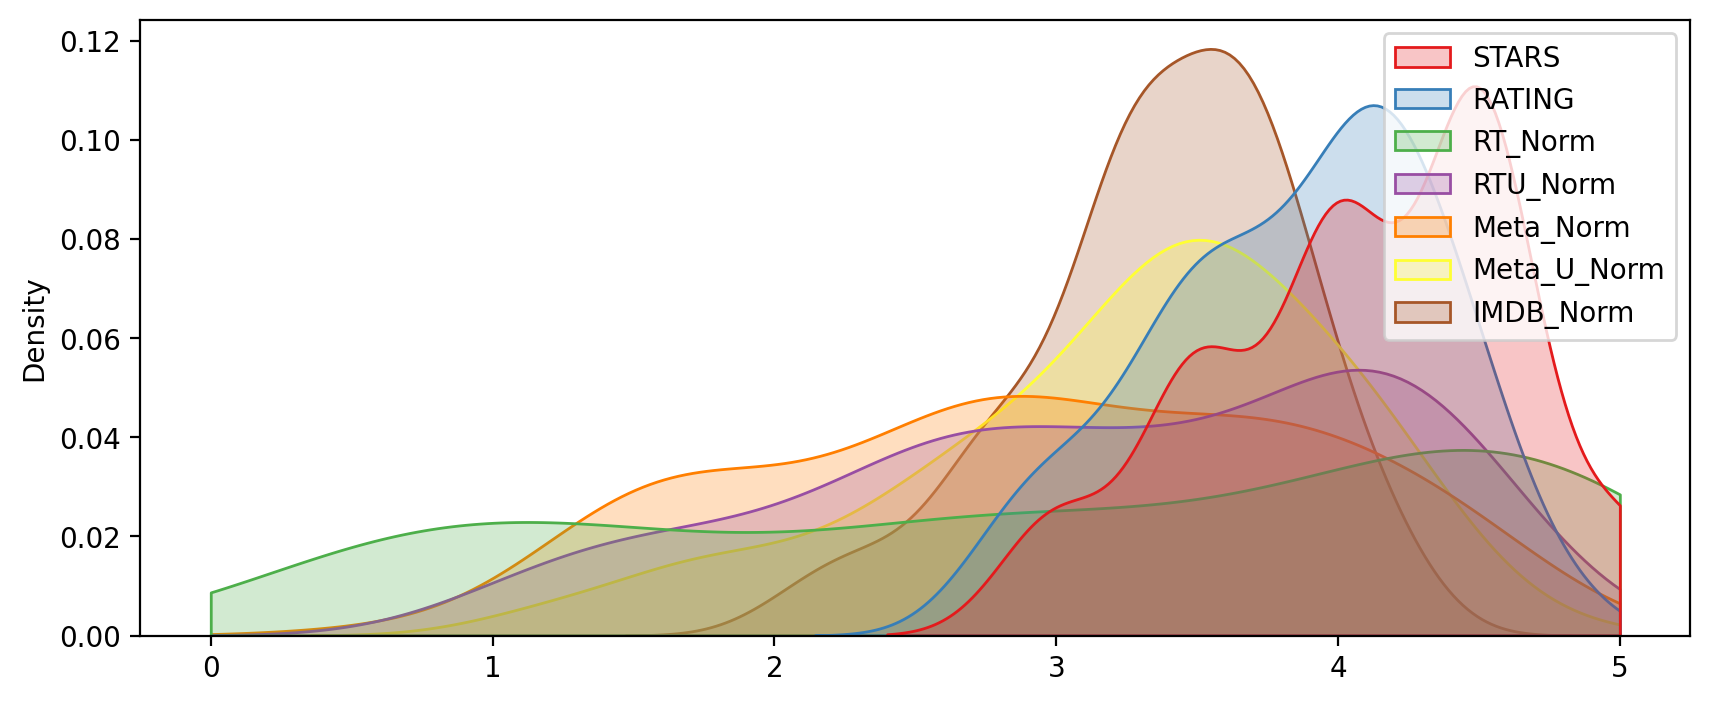

In [62]:

plt.figure(figsize = (10,4),dpi = 200)
sns.kdeplot(data = norm,fill=True, clip = [0,5],palette = 'Set1')
# sns.move_legend()
# plt.legend(loc = 'upper left')

<AxesSubplot:ylabel='Density'>

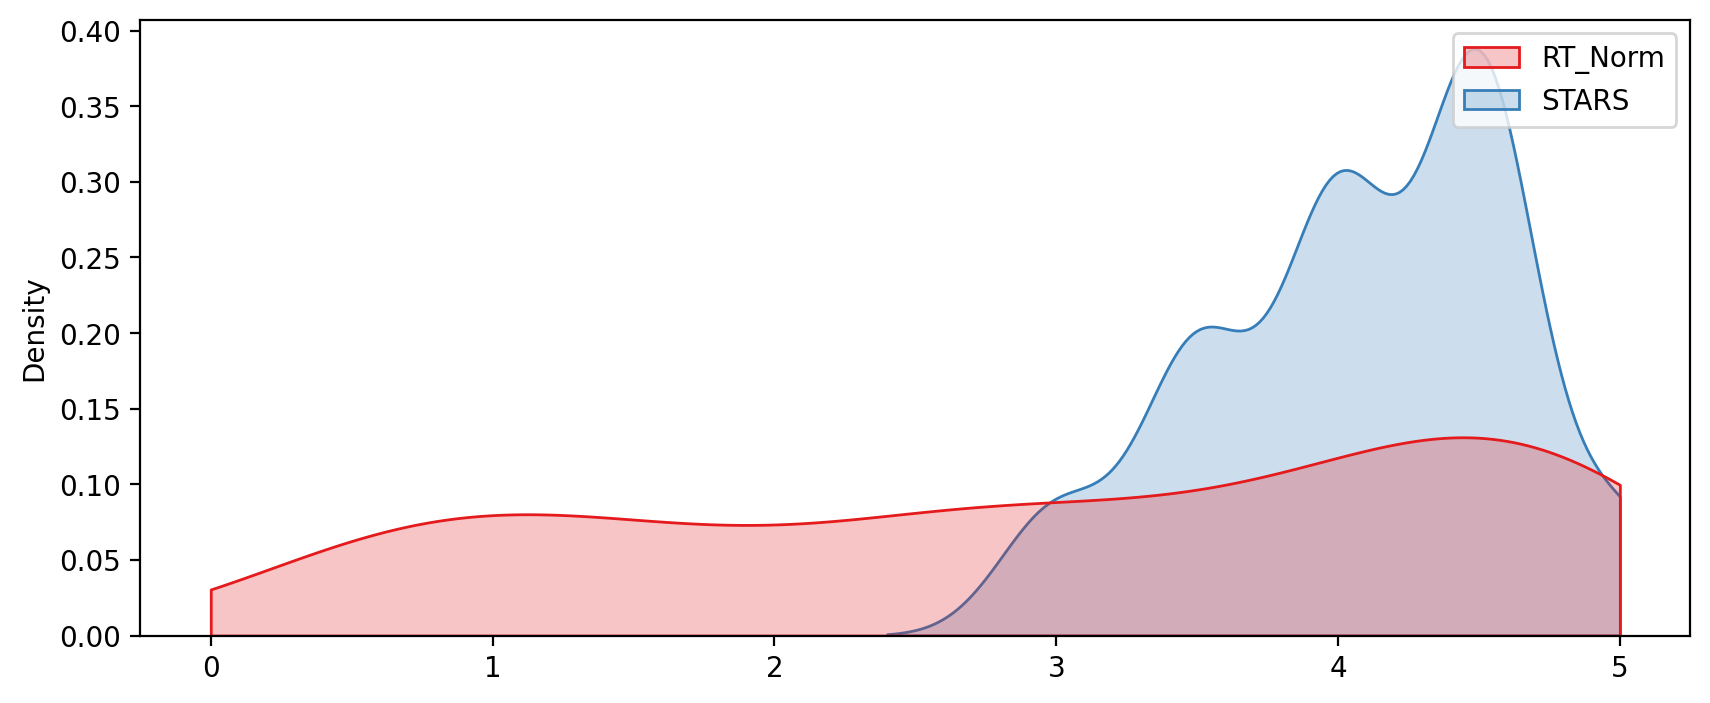

In [63]:
 
plt.figure(figsize = (10,4),dpi = 200)
sns.kdeplot(data = norm[['RT_Norm','STARS']],fill=True, clip = [0,5],palette = 'Set1')
# sns.move_legend()
# plt.legend(loc = 'upper left')

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

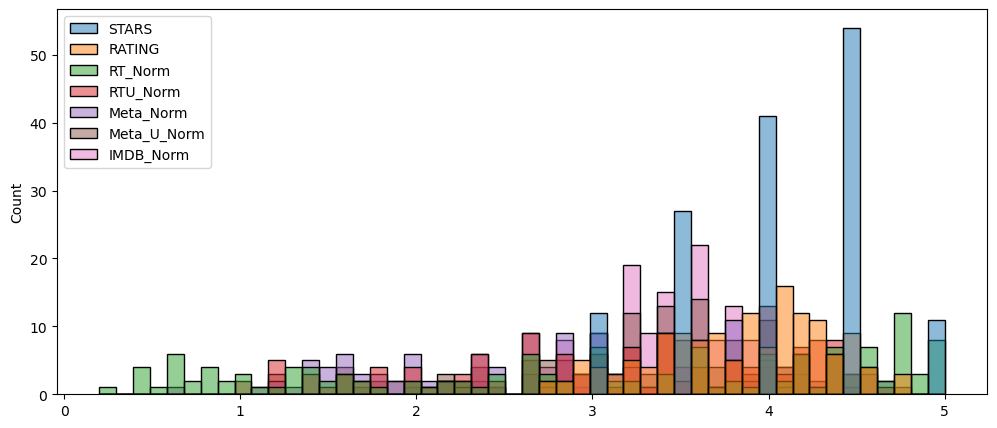

In [67]:

 
plt.figure(figsize = (12,5))
sns.histplot(data = norm, bins =50)


### How are the worst movies rated across all platforms?

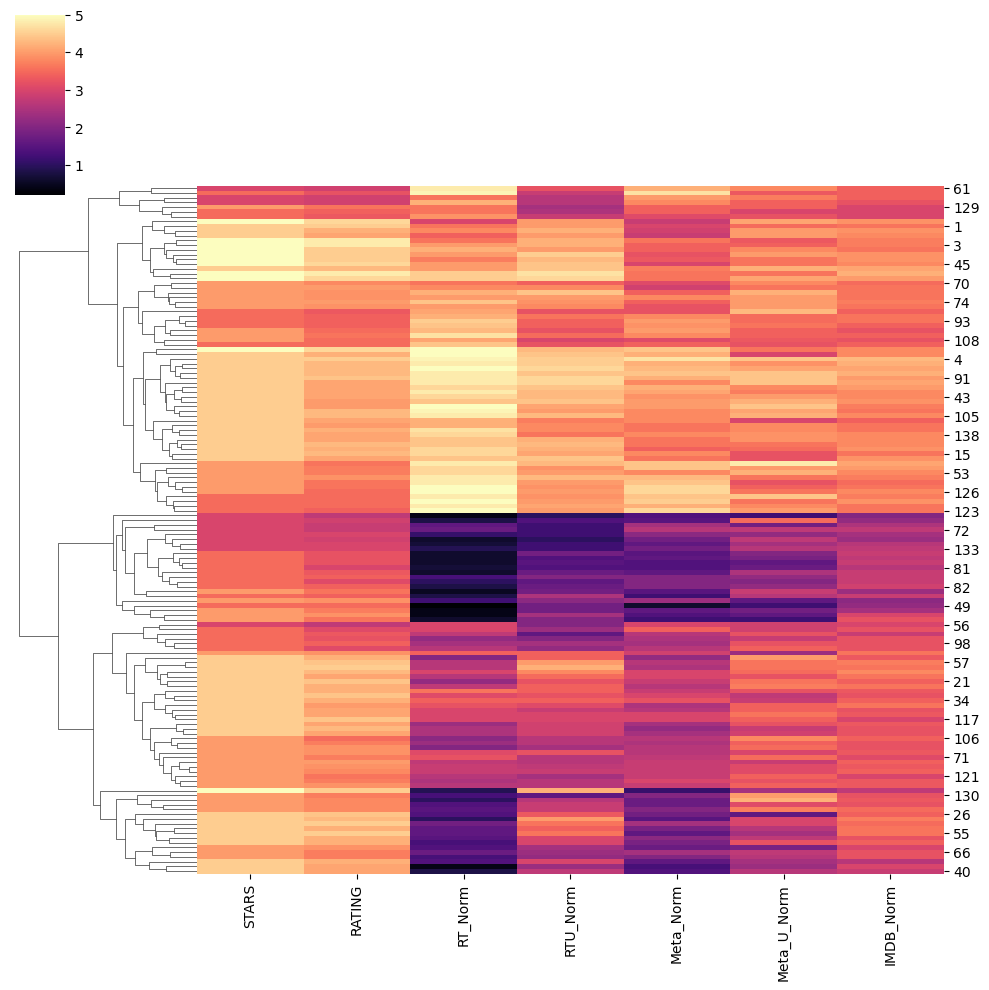

In [68]:
  
sns.clustermap(norm, cmap = 'magma',col_cluster= False)

In [69]:
  
norm.columns


Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [74]:
normf = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]
f=normf.nsmallest(10,'RT_Norm')

**Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

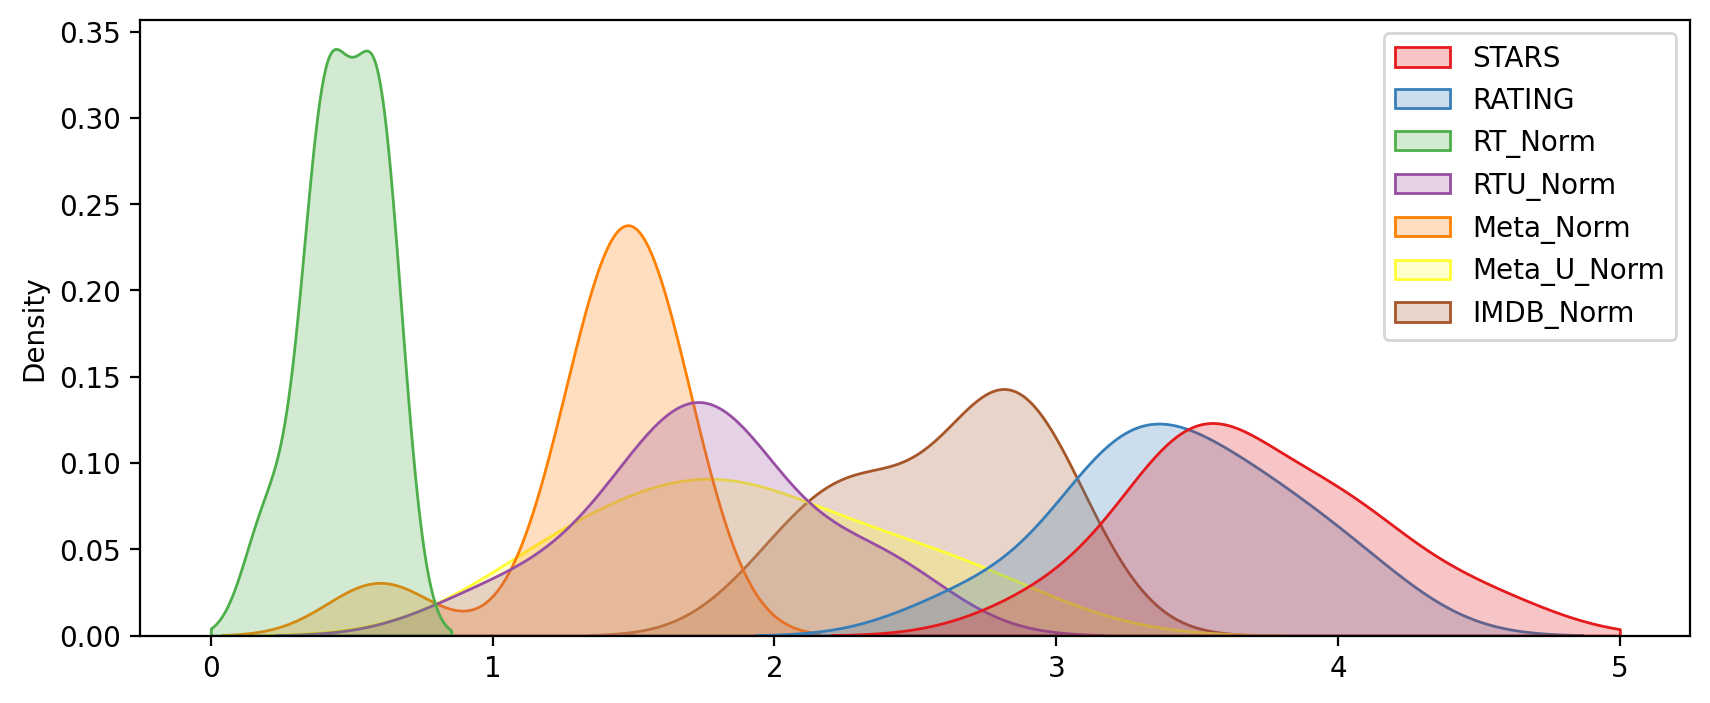

In [75]:
  
plt.figure(figsize = (10,4),dpi = 200)
sns.kdeplot(data = f,fill=True, clip = [0,5],palette = 'Set1')
# sns.move_legend()

----